<a href="https://colab.research.google.com/github/spy129/MAT494/blob/main/Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Learning**

install the environment about Qiskit

In [2]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-gqdyvaiz
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-gqdyvaiz
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
     |████████████████████████████████| 4.8 MB 44.5 MB/s 
     |████████████████████████████████| 19.2 MB 266 kB/s 
     |████████████████████████████████| 240 kB 65.2 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 106 kB 42.4 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 49 kB 6.4 MB/s 
     |████████████████████████████████| 943 kB 63.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 4.1 MB 43.9 MB/s 
     |████████████████████████████████| 1.9 MB 52.9 MB/s 


In [15]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

binary to decimal

In [16]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [17]:
qc_output = QuantumCircuit(8)
qc_output.measure_all()
qc_output.draw(initial_state=False)

░ ┌─┐                     
   q_0: ─░─┤M├─────────────────────
         ░ └╥┘┌─┐                  
   q_1: ─░──╫─┤M├──────────────────
         ░  ║ └╥┘┌─┐               
   q_2: ─░──╫──╫─┤M├───────────────
         ░  ║  ║ └╥┘┌─┐            
   q_3: ─░──╫──╫──╫─┤M├────────────
         ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ─░──╫──╫──╫──╫─┤M├─────────
         ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ─░──╫──╫──╫──╫──╫─┤M├──────
         ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ─░──╫──╫──╫──╫──╫──╫─┤M├───
         ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ─░──╫──╫──╫──╫──╫──╫──╫─┤M├
         ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas_0: ════╩══╬══╬══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║  ║  ║ 
meas_1: ═══════╩══╬══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║  ║ 
meas_2: ══════════╩══╬══╬══╬══╬══╬═
                     ║  ║  ║  ║  ║ 
meas_3: ═════════════╩══╬══╬══╬══╬═
                        ║  ║  ║  ║ 
meas_4: ════════════════╩══╬══╬══╬═
                           ║  ║  ║ 
meas_5: ═══════════════════╩══╬══╬═
                              ║  ║ 
meas_6: ══════════════════════╩══╬═
                                 ║ 
meas_7: ═════════════════════════╩═

Now we set the q7 as 1

In [18]:
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [19]:
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas_0: ═════════╩══╬══╬══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║  ║  ║ 
meas_1: ════════════╩══╬══╬══╬══╬══╬══╬═
                       ║  ║  ║  ║  ║  ║ 
meas_2: ═══════════════╩══╬══╬══╬══╬══╬═
                          ║  ║  ║  ║  ║ 
meas_3: ══════════════════╩══╬══╬══╬══╬═
                             ║  ║  ║  ║ 
meas_4: ═════════════════════╩══╬══╬══╬═
                                ║  ║  ║ 
meas_5: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_6: ═══════════════════════════╩══╬═
                                      ║ 
meas_7: ══════════════════════════════╩═

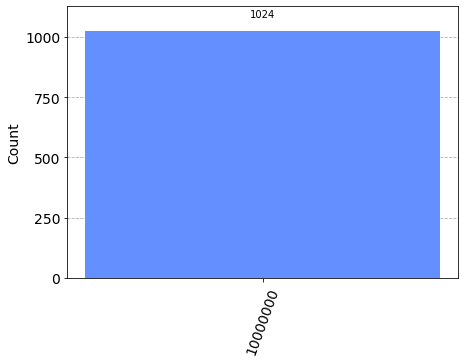

In [20]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Now we set the q1 and q5 as 1

In [21]:
qc_encode = QuantumCircuit(8)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
        ┌───┐ ░ └╥┘┌─┐                  
   q_1: ┤ X ├─░──╫─┤M├──────────────────
        └───┘ ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
        ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ┤ X ├─░──╫──╫──╫──╫──╫─┤M├──────
        └───┘ ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
              ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ──────░──╫──╫──╫──╫──╫──╫──╫─┤M├
              ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas_0: ═════════╩══╬══╬══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║  ║  ║ 
meas_1: ════════════╩══╬══╬══╬══╬══╬══╬═
                       ║  ║  ║  ║  ║  ║ 
meas_2: ═══════════════╩══╬══╬══╬══╬══╬═
                          ║  ║  ║  ║  ║ 
meas_3: ══════════════════╩══╬══╬══╬══╬═
                             ║  ║  ║  ║ 
meas_4: ═════════════════════╩══╬══╬══╬═
                                ║  ║  ║ 
meas_5: ════════════════════════╩══╬══╬═
                                   ║  ║ 
meas_6: ═══════════════════════════╩══╬═
                                      ║ 
meas_7: ══════════════════════════════╩═

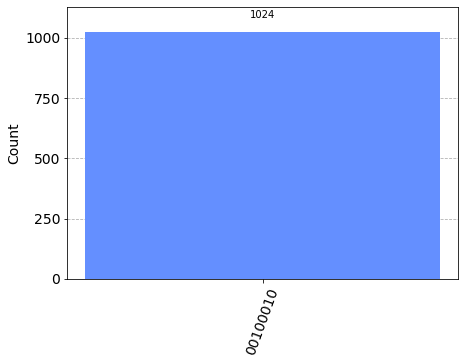

In [22]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)

Add in Qiskit

In [23]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

Representing Qubit States

In [24]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [25]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q: ┤ Initialize(0,1) ├
   └─────────────────┘

In [26]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [27]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result
qc.measure_all()
qc.draw()

┌─────────────────┐ statevector  ░ ┌─┐
   q: ┤ Initialize(0,1) ├──────░───────░─┤M├
      └─────────────────┘      ░       ░ └╥┘
meas: ════════════════════════════════════╩═

# **Multiple Qubits and Entanglement**

In [28]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [29]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [30]:
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()


In [31]:
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

In [32]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘